In [112]:
# !pip install pycoingecko

In [113]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt

In [114]:
gecko_list = [
    "ethereum"
]

In [115]:
cg = CoinGeckoAPI()

In [116]:
timePeriod = 300

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

In [117]:
df_cyptocurrency = pd.concat(frame_list, axis=1).sort_index()
df_cyptocurrency

ethereum
1658448000000  1576.825239
1658534400000  1536.124922
1658620800000  1552.496489
1658707200000  1601.207967
1658793600000  1450.482285
...                    ...
1684022400000  1797.199470
1684108800000  1799.008659
1684195200000  1820.044760
1684281600000  1823.663018
1684340664000  1796.895609

[301 rows x 1 columns]

In [118]:
df_cyptocurrency["datetime"] = pd.to_datetime(df_cyptocurrency.index, unit="ms")
df_cyptocurrency["date"] = df_cyptocurrency["datetime"].dt.date
df_cyptocurrency["hour"] = df_cyptocurrency["datetime"].dt.hour
df_cyptocurrency

ethereum            datetime        date  hour
1658448000000  1576.825239 2022-07-22 00:00:00  2022-07-22     0
1658534400000  1536.124922 2022-07-23 00:00:00  2022-07-23     0
1658620800000  1552.496489 2022-07-24 00:00:00  2022-07-24     0
1658707200000  1601.207967 2022-07-25 00:00:00  2022-07-25     0
1658793600000  1450.482285 2022-07-26 00:00:00  2022-07-26     0
...                    ...                 ...         ...   ...
1684022400000  1797.199470 2023-05-14 00:00:00  2023-05-14     0
1684108800000  1799.008659 2023-05-15 00:00:00  2023-05-15     0
1684195200000  1820.044760 2023-05-16 00:00:00  2023-05-16     0
1684281600000  1823.663018 2023-05-17 00:00:00  2023-05-17     0
1684340664000  1796.895609 2023-05-17 16:24:24  2023-05-17    16

[301 rows x 4 columns]

In [119]:
df_cyptocurrency = df_cyptocurrency.melt(
    id_vars=["datetime", "date", "hour"], var_name="currency_name", ignore_index=True
)
df_cyptocurrency.head(5)

datetime        date  hour currency_name        value
0 2022-07-22  2022-07-22     0      ethereum  1576.825239
1 2022-07-23  2022-07-23     0      ethereum  1536.124922
2 2022-07-24  2022-07-24     0      ethereum  1552.496489
3 2022-07-25  2022-07-25     0      ethereum  1601.207967
4 2022-07-26  2022-07-26     0      ethereum  1450.482285

In [120]:
df_cyptocurrency.dropna(inplace=True)

In [121]:
curr = dict(
    [
        ("ethereum", "ETH"),
    ]
)

df_cyptocurrency["coin_symbol"] = df_cyptocurrency["currency_name"].apply(
    lambda c: curr[c]
)

In [122]:
df_cyptocurrency

datetime        date  hour currency_name        value  \
0   2022-07-22 00:00:00  2022-07-22     0      ethereum  1576.825239   
1   2022-07-23 00:00:00  2022-07-23     0      ethereum  1536.124922   
2   2022-07-24 00:00:00  2022-07-24     0      ethereum  1552.496489   
3   2022-07-25 00:00:00  2022-07-25     0      ethereum  1601.207967   
4   2022-07-26 00:00:00  2022-07-26     0      ethereum  1450.482285   
..                  ...         ...   ...           ...          ...   
296 2023-05-14 00:00:00  2023-05-14     0      ethereum  1797.199470   
297 2023-05-15 00:00:00  2023-05-15     0      ethereum  1799.008659   
298 2023-05-16 00:00:00  2023-05-16     0      ethereum  1820.044760   
299 2023-05-17 00:00:00  2023-05-17     0      ethereum  1823.663018   
300 2023-05-17 16:24:24  2023-05-17    16      ethereum  1796.895609   

    coin_symbol  
0           ETH  
1           ETH  
2           ETH  
3           ETH  
4           ETH  
..          ...  
296         ETH  
297         ETH  
298         ETH  
299         ETH  
300         ETH  

[301 rows x 6 columns]

In [123]:
df_cyptocurrency = df_cyptocurrency.rename(columns={'date': 'Date', 'value': 'Value'})

In [124]:
df_cyptocurrency.dtypes

datetime         datetime64[ns]
Date                     object
hour                      int64
currency_name            object
Value                   float64
coin_symbol              object
dtype: object

In [125]:
# df_cyptocurrency['Date'] = pd.to_datetime(df_cyptocurrency['datetime'])
df_filtered = df_cyptocurrency[(df_cyptocurrency['datetime'] >= '2022-08-15') & (df_cyptocurrency['datetime'] <= '2022-09-15')]

In [126]:
df_filtered.head(5)

datetime        Date  hour currency_name        Value coin_symbol
24 2022-08-15  2022-08-15     0      ethereum  1936.701164         ETH
25 2022-08-16  2022-08-16     0      ethereum  1908.277642         ETH
26 2022-08-17  2022-08-17     0      ethereum  1880.600101         ETH
27 2022-08-18  2022-08-18     0      ethereum  1834.826453         ETH
28 2022-08-19  2022-08-19     0      ethereum  1850.111291         ETH

----
### Plotting para permitir verificar a variação do preço

In [127]:
df_daily = df_filtered.groupby(['Date', 'currency_name'])['Value'].agg('mean').reset_index()


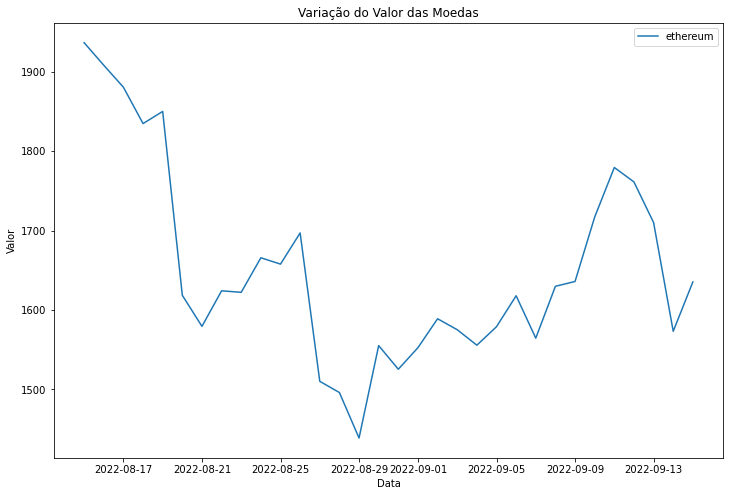

In [128]:
fig, ax = plt.subplots(figsize=(12, 8))

for currency in df_daily['currency_name'].unique():
    df_currency = df_daily[df_daily['currency_name'] == currency]
    ax.plot(df_currency['Date'], df_currency['Value'], label=currency)

ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.set_title('Variação do Valor das Moedas')
ax.legend()
plt.show()


In [129]:
df_filtered = df_filtered[ ~( df_filtered.isin( [np.inf, -np.inf]).any(axis =1) )] #to remove inf

In [130]:
df_filtered.to_csv('../data/price_mining.csv', index=False)

In [131]:
print(np.isinf(df_filtered['Value']).any()) 

False


In [132]:
df_filtered['Value'].isnull().values.any()

False

In [134]:
df_filtered["Date"].unique()

array([datetime.date(2022, 8, 15), datetime.date(2022, 8, 16),
       datetime.date(2022, 8, 17), datetime.date(2022, 8, 18),
       datetime.date(2022, 8, 19), datetime.date(2022, 8, 20),
       datetime.date(2022, 8, 21), datetime.date(2022, 8, 22),
       datetime.date(2022, 8, 23), datetime.date(2022, 8, 24),
       datetime.date(2022, 8, 25), datetime.date(2022, 8, 26),
       datetime.date(2022, 8, 27), datetime.date(2022, 8, 28),
       datetime.date(2022, 8, 29), datetime.date(2022, 8, 30),
       datetime.date(2022, 8, 31), datetime.date(2022, 9, 1),
       datetime.date(2022, 9, 2), datetime.date(2022, 9, 3),
       datetime.date(2022, 9, 4), datetime.date(2022, 9, 5),
       datetime.date(2022, 9, 6), datetime.date(2022, 9, 7),
       datetime.date(2022, 9, 8), datetime.date(2022, 9, 9),
       datetime.date(2022, 9, 10), datetime.date(2022, 9, 11),
       datetime.date(2022, 9, 12), datetime.date(2022, 9, 13),
       datetime.date(2022, 9, 14), datetime.date(2022, 9, 15)],
